In [1]:
# platform libraries
import openeo

# utility libraries
from datetime import date
import numpy as np
import xarray as xr
import rioxarray
import json
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import leafmap.foliumap as leafmap

In [ ]:
conn = openeo.connect('https://openeo.dataspace.copernicus.eu/').authenticate_oidc()

In [ ]:
catchment_outline = gpd.read_file('catchment_outline.geojson')

In [ ]:
bbox = catchment_outline.bounds.iloc[0]
collection      = 'SENTINEL2_L2A'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3],'crs':4326}
temporal_extent = ['2018-02-10', '2018-02-13']
bands           = ['B03', 'B11', 'SCL']

In [ ]:
s2 = conn.load_collection(collection,
                          spatial_extent=spatial_extent, # put json here
                          bands=bands,
                          temporal_extent=temporal_extent)

In [ ]:
# filter to the exact outline of the catchment: this should mask out the pixels outside of the catchment. The process are doing this not correctly. They base the masking on chunks.
#s2_catch = s2.filter_spatial(catchment_outline['geometry'][0])
s2_catch = s2.mask_polygon(catchment_outline['geometry'][0])
s2_catch

In [ ]:
s2_catch.download("s2_catch_2.nc")

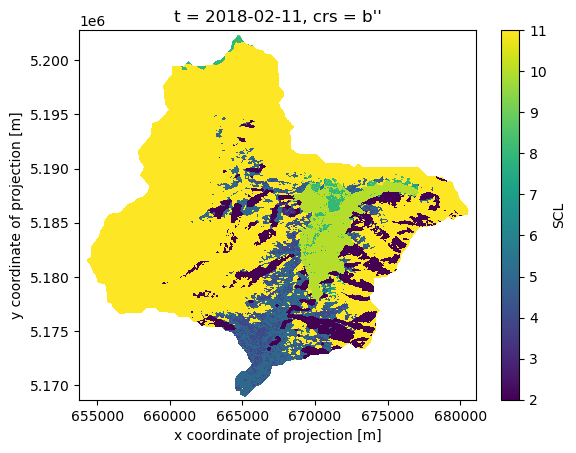

In [2]:
xr.open_dataset("s2_catch_2.nc",decode_coords="all").SCL[0].plot.imshow()

In [ ]:
green = s2_catch.band("B03")
swir = s2_catch.band("B11")
ndsi = (green - swir) / (green + swir)
ndsi.download("ndsi.nc")

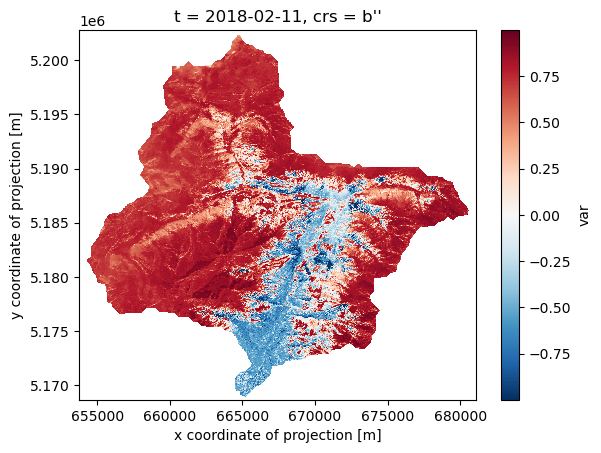

In [3]:
xr.open_dataarray("ndsi.nc",decode_coords="all")[0].plot.imshow()

In [ ]:
snowmap = ndsi > 0.4
snowmap.download("snowmap.nc")

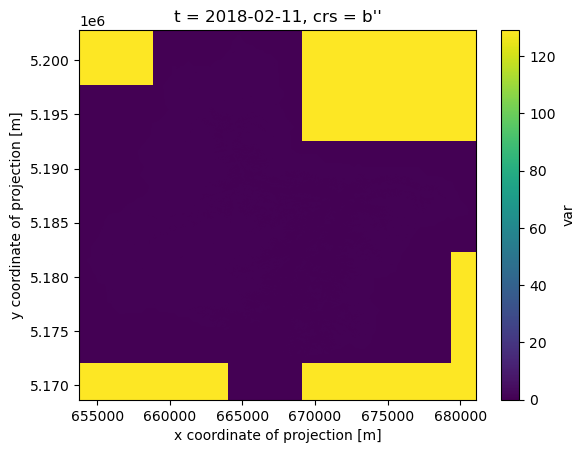

In [4]:
xr.open_dataarray("snowmap.nc",decode_coords="all")[0].plot.imshow()

In [ ]:
snowmap = ( ndsi > 0.4 ) * 1.0
snowmap.download("snowmap.nc")

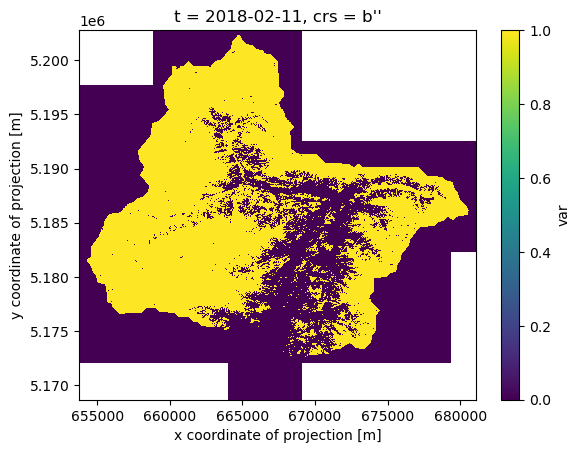

In [5]:
xr.open_dataarray("snowmap_2.nc",decode_coords="all")[0].plot.imshow()